Incomplete

In [1]:
import pandas as pd
import nltk as nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('wordnet')
import re

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yigi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load train.csv
train_data = pd.read_csv("train.csv")

# Display the first few rows to understand the structure
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
# Basic Info
print("Dataset Info:")
print(train_data.info())
print("\nSample Data:")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None

Sample Data:


In [4]:
# Label Distribution
label_cols = ["toxic", "insult", "obscene", "threat", "identity_hate"]  # Update with your label columns
label_counts = train_data[label_cols].sum()
print("\nLabel Distribution:")
print(label_counts)


Label Distribution:
toxic            15294
insult            7877
obscene           8449
threat             478
identity_hate     1405
dtype: int64


In [5]:
def preprocess_text_eda(text):
    """
    A simple preprocessing function for EDA.
    Retains as much context as possible while cleaning noise.
    """
    # Convert to lowercase to make analysis case-insensitive
    text = text.lower()

    # Replace URLs with a placeholder
    text = re.sub(r"http\S+|www\S+|https\S+", "<URL>", text, flags=re.MULTILINE)

    # Replace user mentions (e.g., @username) with a placeholder
    text = re.sub(r"@\w+", "<USER>", text)

    # Replace hashtags (#topic) with the word itself
    text = re.sub(r"#(\w+)", r"\1", text)

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [6]:
# Preprocess the data for EDA
train_data['cleaned_comment'] = train_data['comment_text'].apply(preprocess_text_eda)
print(train_data[['comment_text', 'cleaned_comment']].head())


                                        comment_text  \
0  Explanation\r\nWhy the edits made under my use...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\r\nMore\r\nI can't make any real suggestions...   
4  You, sir, are my hero. Any chance you remember...   

                                     cleaned_comment  
0  explanation why the edits made under my userna...  
1  d'aww! he matches this background colour i'm s...  
2  hey man, i'm really not trying to edit war. it...  
3  " more i can't make any real suggestions on im...  
4  you, sir, are my hero. any chance you remember...  


In [7]:
# Original vs. cleaned comment lengths
train_data['original_length'] = train_data['comment_text'].apply(len)
train_data['cleaned_length'] = train_data['cleaned_comment'].apply(len)

print(train_data[['original_length', 'cleaned_length']].describe())

       original_length  cleaned_length
count    159571.000000   159571.000000
mean        396.593961      387.871242
std         594.387869      582.362872
min           6.000000        5.000000
25%          97.000000       93.000000
50%         207.000000      201.000000
75%         438.000000      429.000000
max        5000.000000     5000.000000


In [8]:
# Dataset overview
print(train_data.info())

# Distribution of comment lengths
train_data['cleaned_length'] = train_data['cleaned_comment'].apply(len)
train_data['word_count'] = train_data['cleaned_comment'].apply(lambda x: len(x.split()))
print("\nSummary of cleaned comment lengths:")
print(train_data['cleaned_length'].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               159571 non-null  object
 1   comment_text     159571 non-null  object
 2   toxic            159571 non-null  int64 
 3   severe_toxic     159571 non-null  int64 
 4   obscene          159571 non-null  int64 
 5   threat           159571 non-null  int64 
 6   insult           159571 non-null  int64 
 7   identity_hate    159571 non-null  int64 
 8   cleaned_comment  159571 non-null  object
 9   original_length  159571 non-null  int64 
 10  cleaned_length   159571 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 13.4+ MB
None

Summary of cleaned comment lengths:
count    159571.000000
mean        387.871242
std         582.362872
min           5.000000
25%          93.000000
50%         201.000000
75%         429.000000
max        5000.000000
Name: cleaned_

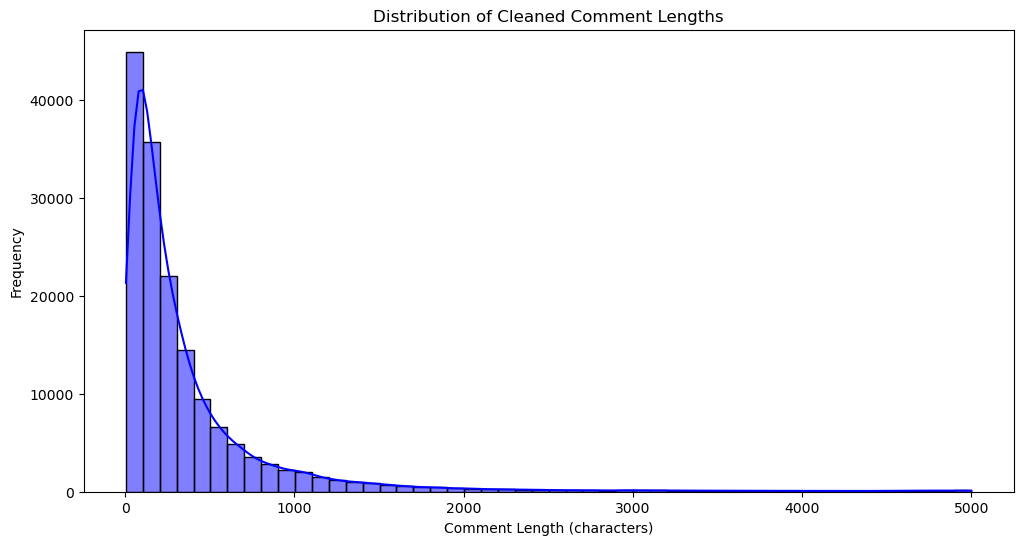

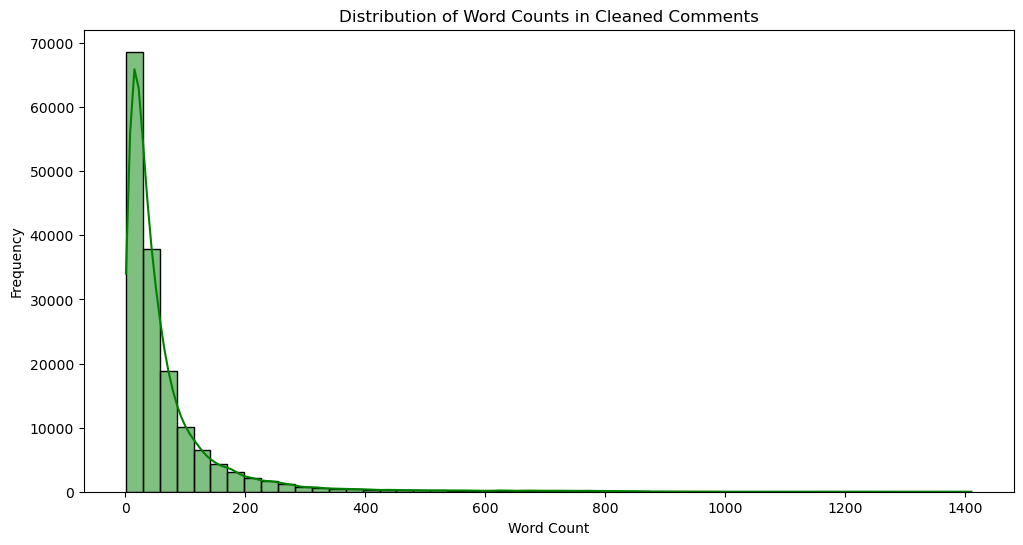

In [9]:
# Distribution of comment lengths
plt.figure(figsize=(12, 6))
sns.histplot(train_data['cleaned_length'], bins=50, kde=True, color='blue')
plt.title("Distribution of Cleaned Comment Lengths")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Distribution of word counts
plt.figure(figsize=(12, 6))
sns.histplot(train_data['word_count'], bins=50, kde=True, color='green')
plt.title("Distribution of Word Counts in Cleaned Comments")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Define negative comments
label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
train_data["negative_comment"] = train_data[label_columns].max(axis=1)  # 1 if any label is True, 0 otherwise

# Split into negative and non-negative groups
negative_comments = train_data[train_data["negative_comment"] == 1]
non_negative_comments = train_data[train_data["negative_comment"] == 0]


Label Distribution:
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


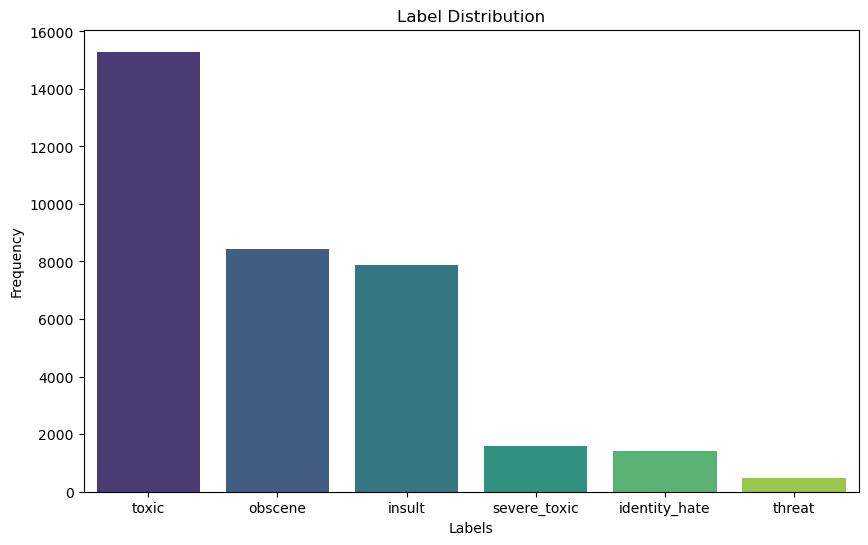

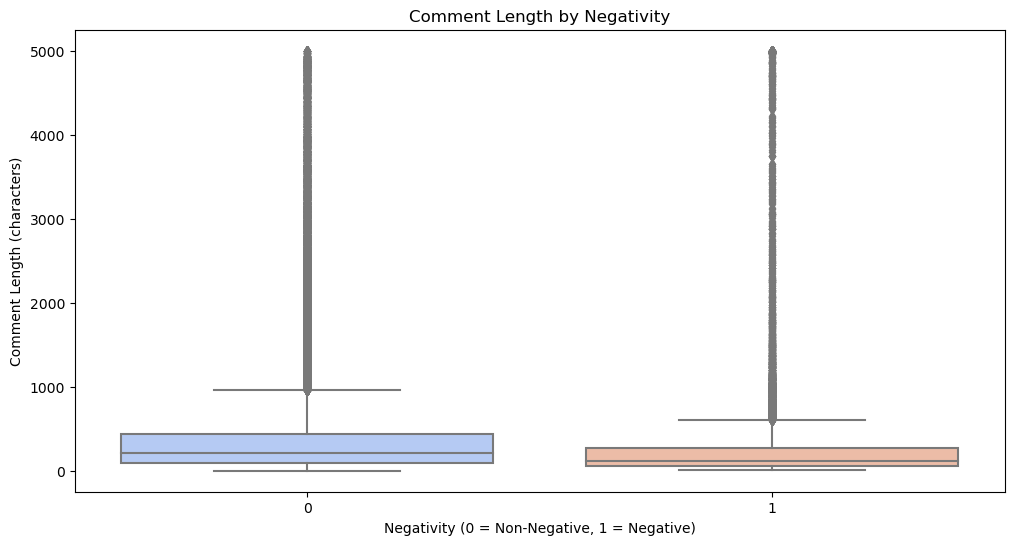

In [11]:
# Label distribution
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_distribution = train_data[label_cols].sum().sort_values(ascending=False)
print("\nLabel Distribution:")
print(label_distribution)

# Visualize label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")
plt.title("Label Distribution")
plt.ylabel("Frequency")
plt.xlabel("Labels")
plt.show()

# Relationship between labels and comment lengths
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='negative_comment', y='cleaned_length', palette="coolwarm")
plt.title("Comment Length by Negativity")
plt.xlabel("Negativity (0 = Non-Negative, 1 = Negative)")
plt.ylabel("Comment Length (characters)")
plt.show()


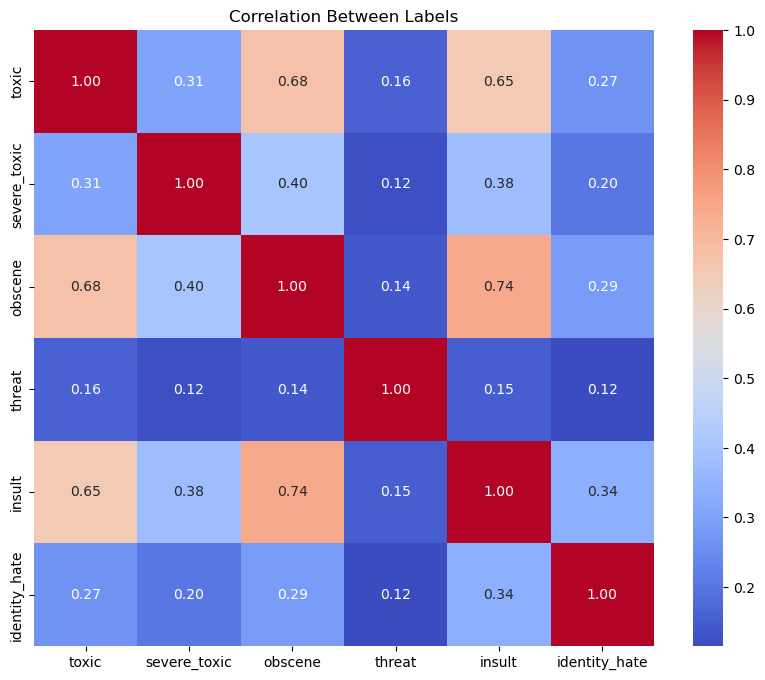

In [12]:
# Compute correlations
label_corr = train_data[label_cols].corr()

# Heatmap for label correlations
plt.figure(figsize=(10, 8))
sns.heatmap(label_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Labels")
plt.show()



Top 10 unigrams:
[('the', 490032), ('to', 294069), ('of', 222834), ('and', 218120), ('a', 211778), ('i', 196695), ('you', 187782), ('is', 170753), ('that', 146478), ('in', 140540)]


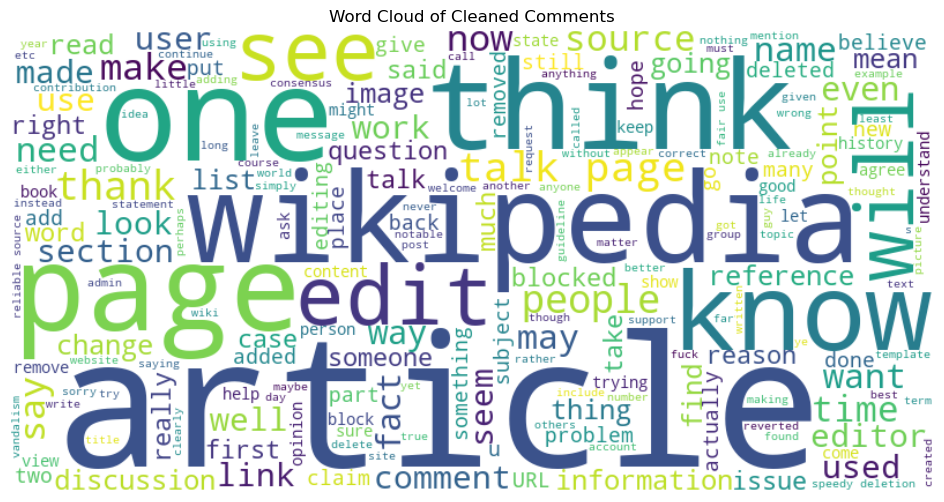

In [13]:
from collections import Counter
from wordcloud import WordCloud

# Combine all comments for word frequency analysis
all_words = " ".join(train_data['cleaned_comment'])

# Most frequent unigrams
unigram_counts = Counter(all_words.split())
print("\nTop 10 unigrams:")
print(unigram_counts.most_common(10))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned Comments")
plt.show()


In [14]:
# Extremely short comments
short_comments = train_data[train_data['cleaned_length'] < 10]
print("\nExamples of very short comments:")
print(short_comments[['cleaned_comment', 'toxic', 'obscene', 'insult']].head())

# Extremely long comments
long_comments = train_data[train_data['cleaned_length'] > 500]
print("\nExamples of very long comments:")
print(long_comments[['cleaned_comment', 'toxic', 'obscene', 'insult']].head())



Examples of very short comments:
      cleaned_comment  toxic  obscene  insult
19815          (<URL>      0        0       0
27719       see <URL>      0        0       0
41648       [ ] <URL>      0        0       0
52442          14:53,      0        0       0
64904           <URL>      0        0       0

Examples of very long comments:
                                      cleaned_comment  toxic  obscene  insult
3   " more i can't make any real suggestions on im...      0        0       0
10  " fair use rationale for image:wonju.jpg thank...      0        0       0
13  before you start throwing accusations and warn...      0        0       0
15  " juelz santanas age in 2002, juelz santana wa...      0        0       0
24  " re-considering 1st paragraph edit? i don't u...      0        0       0


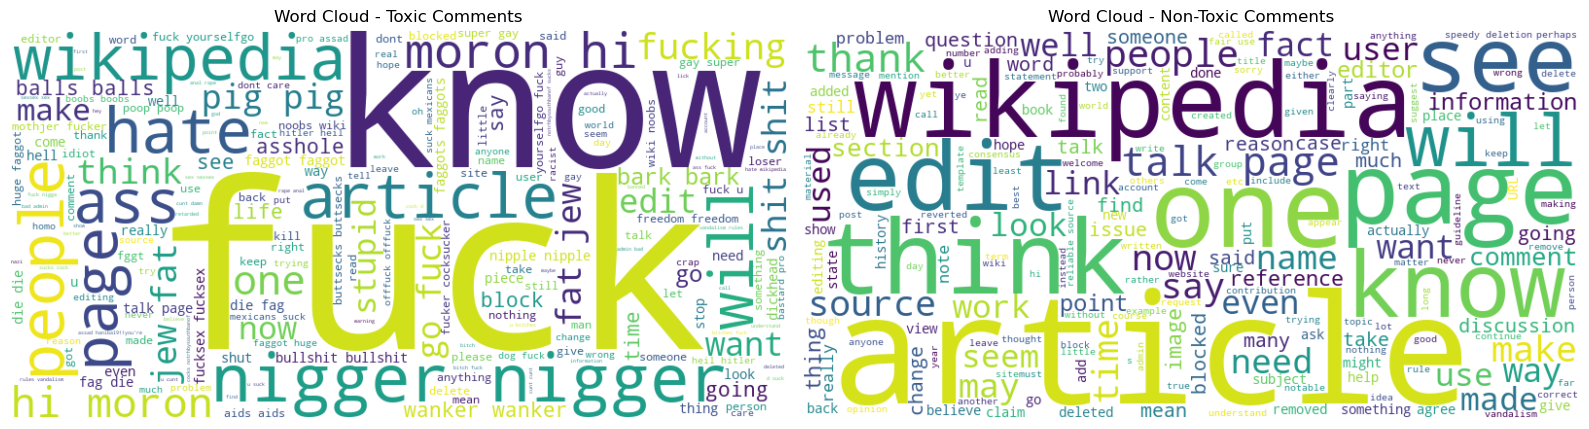

In [15]:
# Separate toxic and non-toxic comments
toxic_comments = " ".join(train_data[train_data['toxic'] == 1]['cleaned_comment'])
non_toxic_comments = " ".join(train_data[train_data['toxic'] == 0]['cleaned_comment'])

# Generate word clouds
toxic_wc = WordCloud(width=800, height=400, background_color="white").generate(toxic_comments)
non_toxic_wc = WordCloud(width=800, height=400, background_color="white").generate(non_toxic_comments)

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(toxic_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Toxic Comments")

plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Non-Toxic Comments")

plt.tight_layout()
plt.show()


In [ ]:
# Select label columns
label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Compute co-occurrence matrix
co_occurrence = train_data[label_columns].T.dot(train_data[label_columns])

# Normalize the matrix to get proportions (optional)
co_occurrence_normalized = co_occurrence / len(train_data)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
plt.title("Label Co-Occurrence Matrix")
plt.show()

In [ ]:
# Count unique combinations of labels
train_data["label_combination"] = train_data[label_columns].apply(lambda row: tuple(row), axis=1)
combination_counts = train_data["label_combination"].value_counts()

# Display the top 10 most frequent combinations
print("Top 10 most common label combinations:")
print(combination_counts.head(10))


In [ ]:
from matplotlib_venn import venn3

# Example: Overlaps between toxic, obscene, and insult
venn3(
    subsets=(
        train_data[(train_data["toxic"] == 1) & (train_data["obscene"] == 0) & (train_data["insult"] == 0)].shape[0],  # Only toxic
        train_data[(train_data["toxic"] == 1) & (train_data["obscene"] == 1) & (train_data["insult"] == 0)].shape[0],  # Toxic and Obscene
        train_data[(train_data["toxic"] == 0) & (train_data["obscene"] == 1) & (train_data["insult"] == 0)].shape[0],  # Only Obscene
        train_data[(train_data["toxic"] == 1) & (train_data["obscene"] == 0) & (train_data["insult"] == 1)].shape[0],  # Toxic and Insult
        train_data[(train_data["toxic"] == 1) & (train_data["obscene"] == 1) & (train_data["insult"] == 1)].shape[0],  # All three
        train_data[(train_data["toxic"] == 0) & (train_data["obscene"] == 1) & (train_data["insult"] == 1)].shape[0],  # Obscene and Insult
        train_data[(train_data["toxic"] == 0) & (train_data["obscene"] == 0) & (train_data["insult"] == 1)].shape[0],  # Only Insult
    ),
    set_labels=("Toxic", "Obscene", "Insult"),
)
plt.title("Overlap Between Toxic, Obscene, and Insult")
plt.show()


In [ ]:
# Count occurrences of "you"
negative_you_count = sum("you" in comment.split() for comment in negative_comments["cleaned_comment"])
non_negative_you_count = sum("you" in comment.split() for comment in non_negative_comments["cleaned_comment"])

# Visualize the counts
categories = ["Negative Comments", "Non-Negative Comments"]
counts = [negative_you_count, non_negative_you_count]

plt.bar(categories, counts, color=["red", "blue"])
plt.title("Distribution of 'you' in Negative vs Non-Negative Comments")
plt.ylabel("Count of 'you'")
plt.show()